# Week 7 Assignment model answer

In [1]:
#Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
## Part 1: loading data and introduction

In [3]:
happy = pandas.read_csv('data/happy.csv')
happy

,happy,ladder,sex,marital,educ,work,income,region,age,leftout
0,0,3,Male,Married/living with a partner,Lower secondary or below,Employed,Low-medium,South East,36,Agree
1,7,7,Male,Single,Lower secondary or below,Employed,Low,South East,53,Disagree
2,3,10,Male,Single,Tertiary education,Employed,Medium-high,North West,60,Disagree
3,5,7,Female,Married/living with a partner,Upper secondary education,Employed,Medium-high,East of England,41,Disagree
4,9,8,Male,Married/living with a partner,Tertiary education,Other,NaN,London,70,Neither agree nor disagree
...,...,...,...,...,...,...,...,...,...,...
995,9,8,Female,Married/living with a partner,Tertiary education,Employed,High,London,34,Strongly disagree
996,8,6,Male,Single,Lower secondary or below,Employed,Low-medium,South East,66,Neither agree nor disagree
997,6,5,Male,Married/living with a partner,Lower secondary or below,Employed,Low-medium,Yorkshire and the Humber,55,Disagree
998,10,6,Male,Married/living with a partner,Tertiary education,Employed,Medium-high,London,30,Agree


1) INTRODUCTION: In this research report I will investigate whether people's perception of their position in society is associated with their happiness. My hypothesis is that people who perceive themselves as higher in society are happier. To investigate this, I will use survey data and regression analysis.

In [4]:
## Part 2: Checking for sample size and missing values
# Change 99s to NaN.

In [5]:
happy[happy==99]=np.nan
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   happy    1000 non-null   int64  
 1   ladder   950 non-null    float64
 2   sex      1000 non-null   object 
 3   marital  998 non-null    object 
 4   educ     1000 non-null   object 
 5   work     1000 non-null   object 
 6   income   747 non-null    object 
 7   region   1000 non-null   object 
 8   age      1000 non-null   int64  
 9   leftout  992 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.3+ KB


2) DATA AND METHODS: The data were collected with an online survey conducted by YouGov in 2019. The data are intended to be representative of the UK population. The survey included questions about the respondents' happiness, their perception of social standing, and demographic and socioeconomic details about the respondent. The outcome variable in this analysis is 'happy' which is measured on a scale of 0-10. The explanatory variable is 'ladder' which is measured on a scale of 1-11. As marital status, age, income, and working status have known associations with happiness, I will treat these as potential confounders and include them as control variables in the regression analysis. The aim is to understand the relationship between perceived social standing and happiness, after controlling for these potential confounders. There were 1000 partipants in the study, but I changed values of 99 to "not a number" for ladder (n = 50). In addition, there are two missing values for marital status and 253 missing values for income.

In [6]:
## Part 3 results
# First give mean and standard deviation of happy
print('mean happiness = ' + str(happy['happy'].mean()))
print('sd of happiness = ' + str(happy['happy'].std()))
# And the mean and standard deviation of ladder
print('mean of "ladder" = ' + str(happy['ladder'].mean()))
print('sd of "ladder" = ' + str(happy['ladder'].std()))

mean happiness = 6.173
sd of happiness = 2.3691103147982875
mean of "ladder" = 6.29578947368421
sd of "ladder" = 1.6340306039488501


In [7]:
# First regression model
reg_formula = sm.regression.linear_model.OLS.from_formula(data = happy, formula = 'happy ~ ladder')
reg_results = reg_formula.fit()

# Get RMSE
RMSE = reg_results.mse_resid**0.5
print('RMSE for first model = ' + str(RMSE))

# View regression results
reg_results.summary() 

RMSE for first model = 2.220492852682248


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     130.3
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           2.30e-28
Time:                        16:53:49   Log-Likelihood:                -2104.8
No. Observations:                 950   AIC:                             4214.
Df Residuals:                     948   BIC:                             4223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9733      0.287     10.363      0.000       2.410       3.536
ladder         0.5035      0.044     11.414      0.000       0.417       0.590
==============================================================================
Omnibus:                       46.213   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.723
Skew:                          -0.559   Prob(JB):                     5.87e-12
Kurtosis:                       3.238   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Second regression model
reg_formula = sm.regression.linear_model.OLS.from_formula(data = happy, formula = 'happy ~ ladder + marital + age + income + work')
reg_results = reg_formula.fit()

#Get RMSE
RMSE = reg_results.mse_resid**0.5
print('RMSE = ' + str(RMSE))

# View regression results
reg_results.summary() 

RMSE = 2.1340217201143625


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     15.30
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           5.87e-25
Time:                        16:53:49   Log-Likelihood:                -1561.9
No. Observations:                 720   AIC:                             3146.
Df Residuals:                     709   BIC:                             3196.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    3.4984      0.734      4.764      0.000       2.057       4.940
marital[T.Married/living with a partner]     0.2266      0.547      0.414      0.679      -0.848       1.301
marital[T.Single]                           -0.0567      0.563     -0.101      0.920      -1.163       1.050
income[T.Low]                               -0.2897      0.281     -1.030      0.304      -0.842       0.263
income[T.Low-medium]                        -0.1946      0.235     -0.829      0.408      -0.656       0.266
income[T.Medium-high]                        0.2107      0.236      0.894      0.371      -0.252       0.673
work[T.Full time student]                   -0.5439      0.603     -0.901      0.368      -1.729       0.641
work[T.Other]                                0.9374      0.256      3.668      0.000       0.436       1.439
work[T.Unemployed/not working]              -0.6511      0.274     -2.380      0.018      -1.188      -0.114
ladder                                       0.4200      0.052      8.032      0.000       0.317       0.523
age                                         -0.0050      0.007     -0.687      0.492      -0.019       0.009
==============================================================================
Omnibus:                       50.134   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.058
Skew:                          -0.642   Prob(JB):                     9.09e-14
Kurtosis:                       3.594   Cond. No.                         681.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3) RESULTS: The mean level of happiness in the sample is 6.173 with a standard deviation of 2.369. The mean level of perceived social standing is 6.296 and the standard deviation is 1.634. The first regression model shows an intercept of 2.9733 which can be interpreted as the average level of happiness when social ladder is at zero. The slope for ladder is 0.5035 suggesting that for every unit increase in social standing, happiness increases by a little over half a point. The standard error for the slope is 0.044 and the slope is thus statistically significantly different to zero. The R-squared for this regression model is 0.121 suggesting that ladder can explain 12.1% of the variation in happiness. The RMSE of 2.220 suggests that there is a considerable spread of values around the regression line. 

Model two includes the control variables which show that are no statistically significant differences in happiness by martial status, or by income group, or by age, as the p-values are all above 0.05 for these variables. There are, on the other hand, statistically significant effects by working status. People with the working status "other" have happiness 0.9374 points higher than people who are employed (the reference category which is omitted from the regression table), and people who are unemployed have happiness 0.6511 points lower than the employed. Once controlling for these variables, the effect of perceived social standing continues to have a statistically significant effect on happiness. The slope coefficient for ladder is 0.4200 in model 2, so somewhat reduced compared to model 1. Model 2 has an R-squared of 0.177 suggesting that we are now explaining 17.7% of the variation in happiness. The RMSE has correspondingly decreased to 2.134. Although this second model is better fitting than the first, there is still considerable variation around the regression line.

<Axes: xlabel='ladder', ylabel='happy'>

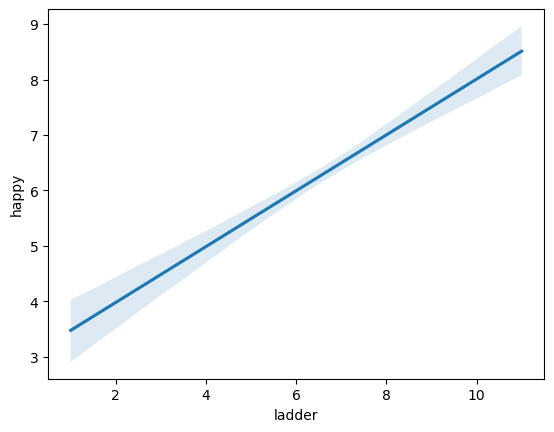

In [9]:
# Part 4 Plot
# Fitted scatter
reg_formula = sm.regression.linear_model.OLS.from_formula(data = happy, formula = 'happy ~ ladder + marital + age + income + work')
reg_results = reg_formula.fit()
# View regression results
reg_results.summary() 
sns.regplot(data=happy, x='ladder', y='happy', scatter=False)

4) PLOT: The regression plot shows the fitted values of ladder on happy. There is a strong positive relationship between ladder and happy. [Other options would be to show an interaction plot here].

5: LIMITATIONS: There are several limitations to this study. First, as the R-squares are on the low side, there is still a lot of unexplained variation in happy. There is a lot of spread of values around the regression line. A major limitation relates to causality. We have no way of knowing from the data if high perceived social standing causes happiness or if happiness changes perceptions of social standing. Another study could collect overtime data, or run an experiment for understanding causality.

6) CONCLUSIONS: This research has shown, using regression analysis, that there is an association between perceptions of social standing with happiness. People who feel higher up in the social hierarchy also feel happier. This association holds even after controlling for age, marital status, working status and income. 